In [41]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

%matplotlib inline

In [42]:
#HERE = Path(__file__).parent
#DATA_FOLDER = HERE / "data"
pd.set_option('display.max_columns', None)

In [43]:
roster = pd.read_csv(
    "data/roster.csv",
    converters={"NetID": str.lower, "Email Address": str.lower},
    usecols=["Section", "Email Address", "NetID"],
    index_col="NetID"
)

hw_exam_grades = pd.read_csv(
    "data/hw_exam_grades.csv",
    converters={"SID": str.lower},
    usecols=lambda x: "Submission" not in x,
    index_col="SID"
)

list1 =  ['data/quiz_1_grades.csv', 'data/quiz_2_grades.csv', 'data/quiz_3_grades.csv',
        'data/quiz_4_grades.csv', 'data/quiz_5_grades.csv']
quiz_grades = pd.DataFrame()
for file_path in list1:
    quiz_name = " ".join(file_path.title().split('/')[1].split("_")[:2])
    quiz = pd.read_csv(
        file_path,
        converters={"Email": str.lower},
        index_col=["Email"],
        usecols=["Email", "Grade"]
    ).rename(columns={"Grade": quiz_name})
    quiz_grades = pd.concat([quiz_grades, quiz], axis=1)


In [44]:
roster.head()

,Email Address,Section
NetID,,
wxb12345,woody.barrera_jr@univ.edu,1
mxl12345,malaika.lambert@univ.edu,2
txj12345,traci.joyce@univ.edu,1
jgf12345,john.g.2.flower@univ.edu,3
smj00936,stacy.johnson@univ.edu,2


In [51]:
hw_exam_grades.head()

,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,Homework 4,Homework 4 - Max Points,Homework 5,Homework 5 - Max Points,Homework 6,Homework 6 - Max Points,Homework 7,Homework 7 - Max Points,Homework 8,Homework 8 - Max Points,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
SID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
axl60952,Aaron,Lester,68.0,80,74,80,77,80,89,100,51,70,87,90,33,50,48,70,42,60,41,60,79,100,63,100,68,100
amc28428,Adam,Cooper,80.0,80,78,80,78,80,87,100,65,70,55,90,44,50,44,70,45,60,53,60,65,100,63,100,90,100
axc64717,Alec,Curry,69.0,80,76,80,66,80,87,100,59,70,83,90,43,50,65,70,58,60,42,60,65,100,78,100,83,100
akr14831,Alexander,Rodriguez,50.0,80,54,80,74,80,75,100,54,70,59,90,38,50,43,70,38,60,47,60,97,100,97,100,81,100
axd11293,Amber,Daniels,54.0,80,57,80,77,80,95,100,47,70,87,90,44,50,58,70,46,60,59,60,68,100,95,100,88,100


In [55]:
hw_exam_grades.columns = hw_exam_grades.columns.str.replace('Homework ', 'Hw_')

In [56]:
hw_exam_grades.head()

,First Name,Last Name,Hw_1,Hw_1 - Max Points,Hw_2,Hw_2 - Max Points,Hw_3,Hw_3 - Max Points,Hw_4,Hw_4 - Max Points,Hw_5,Hw_5 - Max Points,Hw_6,Hw_6 - Max Points,Hw_7,Hw_7 - Max Points,Hw_8,Hw_8 - Max Points,Hw_9,Hw_9 - Max Points,Hw_10,Hw_10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
SID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
axl60952,Aaron,Lester,68.0,80,74,80,77,80,89,100,51,70,87,90,33,50,48,70,42,60,41,60,79,100,63,100,68,100
amc28428,Adam,Cooper,80.0,80,78,80,78,80,87,100,65,70,55,90,44,50,44,70,45,60,53,60,65,100,63,100,90,100
axc64717,Alec,Curry,69.0,80,76,80,66,80,87,100,59,70,83,90,43,50,65,70,58,60,42,60,65,100,78,100,83,100
akr14831,Alexander,Rodriguez,50.0,80,54,80,74,80,75,100,54,70,59,90,38,50,43,70,38,60,47,60,97,100,97,100,81,100
axd11293,Amber,Daniels,54.0,80,57,80,77,80,95,100,47,70,87,90,44,50,58,70,46,60,59,60,68,100,95,100,88,100


In [57]:
quiz_grades.head()

,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5
Email,,,,,
richard.bennett@univ.edu,10,6,9,8,10
timothy.parker@univ.edu,9,14,13,14,10
carol.reyes@univ.edu,5,15,8,14,6
brooke.powers@univ.edu,6,10,17,10,8
michael.taylor@univ.edu,5,15,13,12,5


In [58]:
quiz_grades.describe()

,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,7.413333,10.886667,11.640000,9.506667,7.853333
std,2.127439,2.945903,3.458828,2.928102,2.668199
min,4.000000,6.000000,6.000000,5.000000,4.000000
25%,6.000000,8.000000,9.000000,7.000000,5.250000
50%,7.000000,11.000000,12.000000,9.500000,8.000000
75%,9.000000,14.000000,14.000000,12.000000,10.000000
max,11.000000,15.000000,17.000000,14.000000,12.000000


In [59]:
final_data = pd.merge(
    roster,
    hw_exam_grades,
    left_index=True,
    right_index=True,
)
final_data = pd.merge(
    final_data, quiz_grades, left_on="Email Address", right_index=True)

In [60]:
final_data.head()

,Email Address,Section,First Name,Last Name,Hw_1,Hw_1 - Max Points,Hw_2,Hw_2 - Max Points,Hw_3,Hw_3 - Max Points,Hw_4,Hw_4 - Max Points,Hw_5,Hw_5 - Max Points,Hw_6,Hw_6 - Max Points,Hw_7,Hw_7 - Max Points,Hw_8,Hw_8 - Max Points,Hw_9,Hw_9 - Max Points,Hw_10,Hw_10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,83,100,68,70,87,90,36,50,43,70,45,60,46,60,86,100,62,100,90,100,4,10,11,7,10
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,83,100,61,70,88,90,42,50,58,70,45,60,37,60,60,100,91,100,93,100,8,10,10,13,6
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,NaN,80,77,80,58,80,91,100,66,70,78,90,30,50,69,70,59,60,53,60,100,100,84,100,64,100,8,6,14,9,4
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,75,100,61,70,83,90,41,50,43,70,42,60,40,60,72,100,83,100,77,100,8,8,8,13,5
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,67,100,46,70,85,90,43,50,42,70,59,60,48,60,96,100,80,100,86,100,6,14,11,7,7


In [61]:
final_data = final_data.fillna(0)

In [62]:
final_data.head()

,Email Address,Section,First Name,Last Name,Hw_1,Hw_1 - Max Points,Hw_2,Hw_2 - Max Points,Hw_3,Hw_3 - Max Points,Hw_4,Hw_4 - Max Points,Hw_5,Hw_5 - Max Points,Hw_6,Hw_6 - Max Points,Hw_7,Hw_7 - Max Points,Hw_8,Hw_8 - Max Points,Hw_9,Hw_9 - Max Points,Hw_10,Hw_10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,83,100,68,70,87,90,36,50,43,70,45,60,46,60,86,100,62,100,90,100,4,10,11,7,10
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,83,100,61,70,88,90,42,50,58,70,45,60,37,60,60,100,91,100,93,100,8,10,10,13,6
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,91,100,66,70,78,90,30,50,69,70,59,60,53,60,100,100,84,100,64,100,8,6,14,9,4
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,75,100,61,70,83,90,41,50,43,70,42,60,40,60,72,100,83,100,77,100,8,8,8,13,5
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,67,100,46,70,85,90,43,50,42,70,59,60,48,60,96,100,80,100,86,100,6,14,11,7,7


In [63]:
n_exams = 3
for n in range(1, n_exams + 1):
    final_data[f"Exam {n} Score"] = (
        final_data[f"Exam {n}"] / final_data[f"Exam {n} - Max Points"]
    )


In [64]:
final_data.head()

,Email Address,Section,First Name,Last Name,Hw_1,Hw_1 - Max Points,Hw_2,Hw_2 - Max Points,Hw_3,Hw_3 - Max Points,Hw_4,Hw_4 - Max Points,Hw_5,Hw_5 - Max Points,Hw_6,Hw_6 - Max Points,Hw_7,Hw_7 - Max Points,Hw_8,Hw_8 - Max Points,Hw_9,Hw_9 - Max Points,Hw_10,Hw_10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Exam 1 Score,Exam 2 Score,Exam 3 Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,83,100,68,70,87,90,36,50,43,70,45,60,46,60,86,100,62,100,90,100,4,10,11,7,10,0.86,0.62,0.90
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,83,100,61,70,88,90,42,50,58,70,45,60,37,60,60,100,91,100,93,100,8,10,10,13,6,0.60,0.91,0.93
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,91,100,66,70,78,90,30,50,69,70,59,60,53,60,100,100,84,100,64,100,8,6,14,9,4,1.00,0.84,0.64
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,75,100,61,70,83,90,41,50,43,70,42,60,40,60,72,100,83,100,77,100,8,8,8,13,5,0.72,0.83,0.77
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,67,100,46,70,85,90,43,50,42,70,59,60,48,60,96,100,80,100,86,100,6,14,11,7,7,0.96,0.80,0.86


In [68]:
homework_scores = final_data.filter(regex=r"^Hw_\d\d?$", axis=1)
homework_max_points = final_data.filter(regex=r"^Hw_\d\d? -", axis=1)

sum_of_hw_scores = homework_scores.sum(axis=1)
sum_of_hw_max = homework_max_points.sum(axis=1)
final_data["Total Homework"] = sum_of_hw_scores / sum_of_hw_max

In [70]:
final_data.head()

,Email Address,Section,First Name,Last Name,Hw_1,Hw_1 - Max Points,Hw_2,Hw_2 - Max Points,Hw_3,Hw_3 - Max Points,Hw_4,Hw_4 - Max Points,Hw_5,Hw_5 - Max Points,Hw_6,Hw_6 - Max Points,Hw_7,Hw_7 - Max Points,Hw_8,Hw_8 - Max Points,Hw_9,Hw_9 - Max Points,Hw_10,Hw_10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Exam 1 Score,Exam 2 Score,Exam 3 Score,Total Homework
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,83,100,68,70,87,90,36,50,43,70,45,60,46,60,86,100,62,100,90,100,4,10,11,7,10,0.86,0.62,0.90,0.808108
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,83,100,61,70,88,90,42,50,58,70,45,60,37,60,60,100,91,100,93,100,8,10,10,13,6,0.60,0.91,0.93,0.827027
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,91,100,66,70,78,90,30,50,69,70,59,60,53,60,100,100,84,100,64,100,8,6,14,9,4,1.00,0.84,0.64,0.785135
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,75,100,61,70,83,90,41,50,43,70,42,60,40,60,72,100,83,100,77,100,8,8,8,13,5,0.72,0.83,0.77,0.770270
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,67,100,46,70,85,90,43,50,42,70,59,60,48,60,96,100,80,100,86,100,6,14,11,7,7,0.96,0.80,0.86,0.782432


In [71]:
hw_max_renamed = homework_max_points.set_axis(homework_scores.columns, axis=1)
average_hw_scores = (homework_scores / hw_max_renamed).sum(axis=1)
final_data["Average Homework"] = average_hw_scores / homework_scores.shape[1]

In [72]:
final_data.head()

,Email Address,Section,First Name,Last Name,Hw_1,Hw_1 - Max Points,Hw_2,Hw_2 - Max Points,Hw_3,Hw_3 - Max Points,Hw_4,Hw_4 - Max Points,Hw_5,Hw_5 - Max Points,Hw_6,Hw_6 - Max Points,Hw_7,Hw_7 - Max Points,Hw_8,Hw_8 - Max Points,Hw_9,Hw_9 - Max Points,Hw_10,Hw_10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Exam 1 Score,Exam 2 Score,Exam 3 Score,Total Homework,Average Homework
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,83,100,68,70,87,90,36,50,43,70,45,60,46,60,86,100,62,100,90,100,4,10,11,7,10,0.86,0.62,0.90,0.808108,0.799405
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,83,100,61,70,88,90,42,50,58,70,45,60,37,60,60,100,91,100,93,100,8,10,10,13,6,0.60,0.91,0.93,0.827027,0.818944
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,91,100,66,70,78,90,30,50,69,70,59,60,53,60,100,100,84,100,64,100,8,6,14,9,4,1.00,0.84,0.64,0.785135,0.785940
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,75,100,61,70,83,90,41,50,43,70,42,60,40,60,72,100,83,100,77,100,8,8,8,13,5,0.72,0.83,0.77,0.770270,0.765710
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,67,100,46,70,85,90,43,50,42,70,59,60,48,60,96,100,80,100,86,100,6,14,11,7,7,0.96,0.80,0.86,0.782432,0.787742


In [73]:
final_data["Homework Score"] = final_data[
    ["Total Homework", "Average Homework"]
].max(axis=1)

In [74]:
final_data.head()

,Email Address,Section,First Name,Last Name,Hw_1,Hw_1 - Max Points,Hw_2,Hw_2 - Max Points,Hw_3,Hw_3 - Max Points,Hw_4,Hw_4 - Max Points,Hw_5,Hw_5 - Max Points,Hw_6,Hw_6 - Max Points,Hw_7,Hw_7 - Max Points,Hw_8,Hw_8 - Max Points,Hw_9,Hw_9 - Max Points,Hw_10,Hw_10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Exam 1 Score,Exam 2 Score,Exam 3 Score,Total Homework,Average Homework,Homework Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,83,100,68,70,87,90,36,50,43,70,45,60,46,60,86,100,62,100,90,100,4,10,11,7,10,0.86,0.62,0.90,0.808108,0.799405,0.808108
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,83,100,61,70,88,90,42,50,58,70,45,60,37,60,60,100,91,100,93,100,8,10,10,13,6,0.60,0.91,0.93,0.827027,0.818944,0.827027
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,91,100,66,70,78,90,30,50,69,70,59,60,53,60,100,100,84,100,64,100,8,6,14,9,4,1.00,0.84,0.64,0.785135,0.785940,0.785940
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,75,100,61,70,83,90,41,50,43,70,42,60,40,60,72,100,83,100,77,100,8,8,8,13,5,0.72,0.83,0.77,0.770270,0.765710,0.770270
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,67,100,46,70,85,90,43,50,42,70,59,60,48,60,96,100,80,100,86,100,6,14,11,7,7,0.96,0.80,0.86,0.782432,0.787742,0.787742


In [75]:
quiz_scores = final_data.filter(regex=r"^Quiz \d$", axis=1)
quiz_max_points = pd.Series(
    {"Quiz 1": 11, "Quiz 2": 15, "Quiz 3": 17, "Quiz 4": 14, "Quiz 5": 12}
)

sum_of_quiz_scores = quiz_scores.sum(axis=1)
sum_of_quiz_max = quiz_max_points.sum()
final_data["Total Quizzes"] = sum_of_quiz_scores / sum_of_quiz_max

average_quiz_scores = (quiz_scores / quiz_max_points).sum(axis=1)
final_data["Average Quizzes"] = average_quiz_scores / quiz_scores.shape[1]

final_data["Quiz Score"] = final_data[
    ["Total Quizzes", "Average Quizzes"]
].max(axis=1)

In [76]:
final_data.head()

,Email Address,Section,First Name,Last Name,Hw_1,Hw_1 - Max Points,Hw_2,Hw_2 - Max Points,Hw_3,Hw_3 - Max Points,Hw_4,Hw_4 - Max Points,Hw_5,Hw_5 - Max Points,Hw_6,Hw_6 - Max Points,Hw_7,Hw_7 - Max Points,Hw_8,Hw_8 - Max Points,Hw_9,Hw_9 - Max Points,Hw_10,Hw_10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Exam 1 Score,Exam 2 Score,Exam 3 Score,Total Homework,Average Homework,Homework Score,Total Quizzes,Average Quizzes,Quiz Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,83,100,68,70,87,90,36,50,43,70,45,60,46,60,86,100,62,100,90,100,4,10,11,7,10,0.86,0.62,0.90,0.808108,0.799405,0.808108,0.608696,0.602139,0.608696
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,83,100,61,70,88,90,42,50,58,70,45,60,37,60,60,100,91,100,93,100,8,10,10,13,6,0.60,0.91,0.93,0.827027,0.818944,0.827027,0.681159,0.682149,0.682149
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,91,100,66,70,78,90,30,50,69,70,59,60,53,60,100,100,84,100,64,100,8,6,14,9,4,1.00,0.84,0.64,0.785135,0.785940,0.785940,0.594203,0.585399,0.594203
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,75,100,61,70,83,90,41,50,43,70,42,60,40,60,72,100,83,100,77,100,8,8,8,13,5,0.72,0.83,0.77,0.770270,0.765710,0.770270,0.608696,0.615286,0.615286
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,67,100,46,70,85,90,43,50,42,70,59,60,48,60,96,100,80,100,86,100,6,14,11,7,7,0.96,0.80,0.86,0.782432,0.787742,0.787742,0.652174,0.641836,0.652174


In [77]:
weightings = pd.Series(
    {
        "Exam 1 Score": 0.05,
        "Exam 2 Score": 0.1,
        "Exam 3 Score": 0.15,
        "Quiz Score": 0.30,
        "Homework Score": 0.4,
    }
)

final_data["Final Score"] = (final_data[weightings.index] * weightings).sum(
    axis=1
)
final_data["Ceiling Score"] = np.ceil(final_data["Final Score"] * 100)


In [78]:
final_data.head()

,Email Address,Section,First Name,Last Name,Hw_1,Hw_1 - Max Points,Hw_2,Hw_2 - Max Points,Hw_3,Hw_3 - Max Points,Hw_4,Hw_4 - Max Points,Hw_5,Hw_5 - Max Points,Hw_6,Hw_6 - Max Points,Hw_7,Hw_7 - Max Points,Hw_8,Hw_8 - Max Points,Hw_9,Hw_9 - Max Points,Hw_10,Hw_10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Exam 1 Score,Exam 2 Score,Exam 3 Score,Total Homework,Average Homework,Homework Score,Total Quizzes,Average Quizzes,Quiz Score,Final Score,Ceiling Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,83,100,68,70,87,90,36,50,43,70,45,60,46,60,86,100,62,100,90,100,4,10,11,7,10,0.86,0.62,0.90,0.808108,0.799405,0.808108,0.608696,0.602139,0.608696,0.745852,75.0
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,83,100,61,70,88,90,42,50,58,70,45,60,37,60,60,100,91,100,93,100,8,10,10,13,6,0.60,0.91,0.93,0.827027,0.818944,0.827027,0.681159,0.682149,0.682149,0.795956,80.0
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,91,100,66,70,78,90,30,50,69,70,59,60,53,60,100,100,84,100,64,100,8,6,14,9,4,1.00,0.84,0.64,0.785135,0.785940,0.785940,0.594203,0.585399,0.594203,0.722637,73.0
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,75,100,61,70,83,90,41,50,43,70,42,60,40,60,72,100,83,100,77,100,8,8,8,13,5,0.72,0.83,0.77,0.770270,0.765710,0.770270,0.608696,0.615286,0.615286,0.727194,73.0
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,67,100,46,70,85,90,43,50,42,70,59,60,48,60,96,100,80,100,86,100,6,14,11,7,7,0.96,0.80,0.86,0.782432,0.787742,0.787742,0.652174,0.641836,0.652174,0.767749,77.0


In [79]:
grades = {
    90: "A",
    80: "B",
    70: "C",
    60: "D",
    0: "F",
}

def grade_mapping(value):
    """Map numerical grade to letter grade."""
    for key, letter in grades.items():
        if value >= key:
            return letter


letter_grades = final_data["Ceiling Score"].map(grade_mapping)
final_data["Final Grade"] = pd.Categorical(
    letter_grades, categories=grades.values(), ordered=True
)


In [80]:
final_data.head()

,Email Address,Section,First Name,Last Name,Hw_1,Hw_1 - Max Points,Hw_2,Hw_2 - Max Points,Hw_3,Hw_3 - Max Points,Hw_4,Hw_4 - Max Points,Hw_5,Hw_5 - Max Points,Hw_6,Hw_6 - Max Points,Hw_7,Hw_7 - Max Points,Hw_8,Hw_8 - Max Points,Hw_9,Hw_9 - Max Points,Hw_10,Hw_10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Exam 1 Score,Exam 2 Score,Exam 3 Score,Total Homework,Average Homework,Homework Score,Total Quizzes,Average Quizzes,Quiz Score,Final Score,Ceiling Score,Final Grade
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,83,100,68,70,87,90,36,50,43,70,45,60,46,60,86,100,62,100,90,100,4,10,11,7,10,0.86,0.62,0.90,0.808108,0.799405,0.808108,0.608696,0.602139,0.608696,0.745852,75.0,C
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,83,100,61,70,88,90,42,50,58,70,45,60,37,60,60,100,91,100,93,100,8,10,10,13,6,0.60,0.91,0.93,0.827027,0.818944,0.827027,0.681159,0.682149,0.682149,0.795956,80.0,B
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,91,100,66,70,78,90,30,50,69,70,59,60,53,60,100,100,84,100,64,100,8,6,14,9,4,1.00,0.84,0.64,0.785135,0.785940,0.785940,0.594203,0.585399,0.594203,0.722637,73.0,C
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,75,100,61,70,83,90,41,50,43,70,42,60,40,60,72,100,83,100,77,100,8,8,8,13,5,0.72,0.83,0.77,0.770270,0.765710,0.770270,0.608696,0.615286,0.615286,0.727194,73.0,C
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,67,100,46,70,85,90,43,50,42,70,59,60,48,60,96,100,80,100,86,100,6,14,11,7,7,0.96,0.80,0.86,0.782432,0.787742,0.787742,0.652174,0.641836,0.652174,0.767749,77.0,C


In [81]:
for section, table in final_data.groupby("Section"):
    section_file = f"data/Section {section} Grades.csv"
    num_students = table.shape[0]
    print(
        f"In Section {section} there are {num_students} students saved to "
        f"file {section_file}."
    )
    table.sort_values(by=["Last Name", "First Name"]).to_csv(section_file)

In Section 1 there are 56 students saved to file data/Section 1 Grades.csv.
In Section 2 there are 51 students saved to file data/Section 2 Grades.csv.
In Section 3 there are 43 students saved to file data/Section 3 Grades.csv.


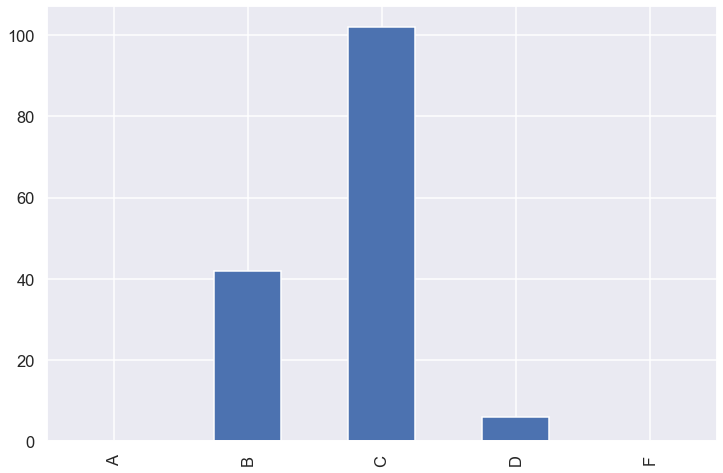

In [123]:
plt.figure(figsize=(12,8))
grade_counts = final_data["Final Grade"].value_counts().sort_index()
grade_counts.plot.bar()
plt.show()

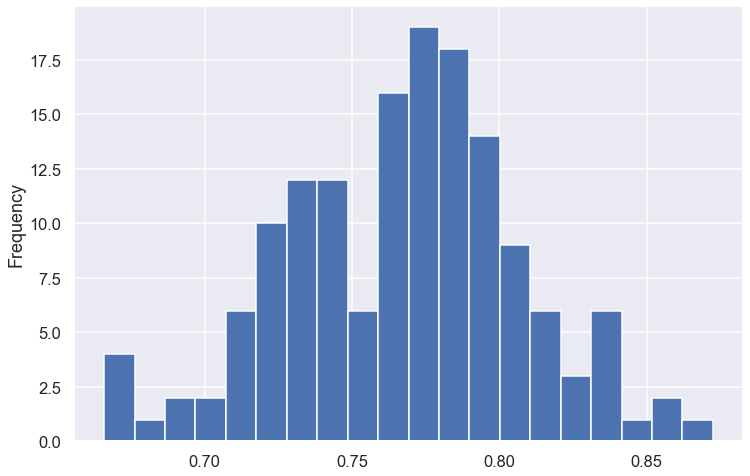

In [122]:
plt.figure(figsize=(12,8))
final_data["Final Score"].plot.hist(bins=20, label="Histogram");

<AxesSubplot:ylabel='Density'>

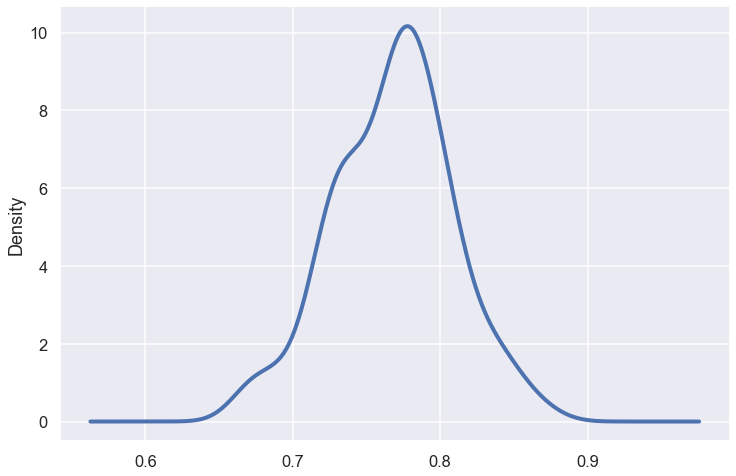

In [121]:
plt.figure(figsize=(12,8))
final_data["Final Score"].plot.density(
    linewidth=4, label="Kernel Density Estimate"
)


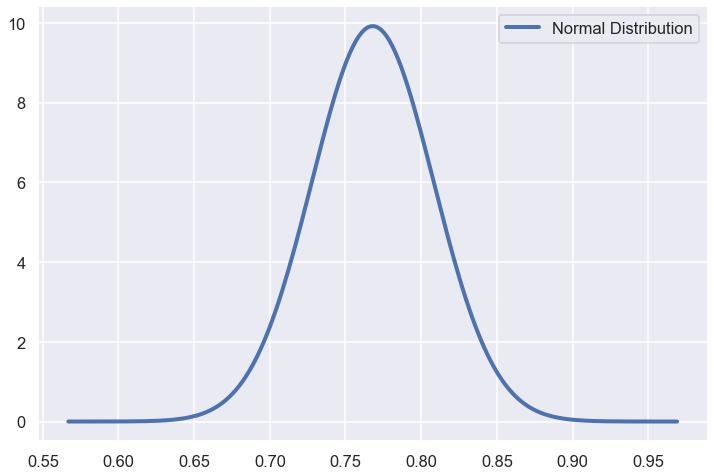

In [120]:
plt.figure(figsize=(12,8))
final_mean = final_data["Final Score"].mean()
final_std = final_data["Final Score"].std()
x = np.linspace(final_mean - 5 * final_std, final_mean + 5 * final_std, 200)
normal_dist = scipy.stats.norm.pdf(x, loc=final_mean, scale=final_std)
plt.plot(x, normal_dist, label="Normal Distribution", linewidth=4)
plt.legend()
plt.show()


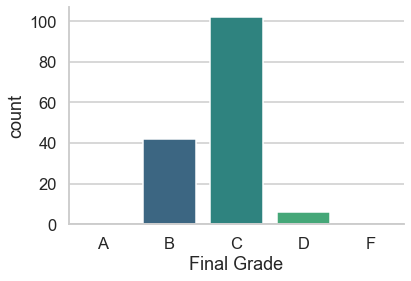

In [118]:
sns.set_theme('talk')
sns.set_style('whitegrid')
sns.countplot(data=final_data, x="Final Grade", palette='viridis')
sns.despine()

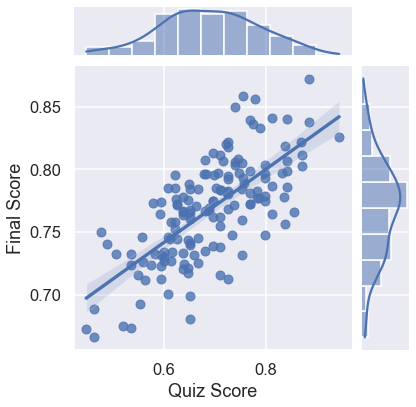

In [124]:
sns.jointplot(x='Quiz Score',y='Final Score',data=final_data,kind='reg')

In [95]:
final_data['Final Grade'].value_counts()

C    102
B     42
D      6
A      0
F      0
Name: Final Grade, dtype: int64

In [103]:
final_data.index.name = 'Reg_No'